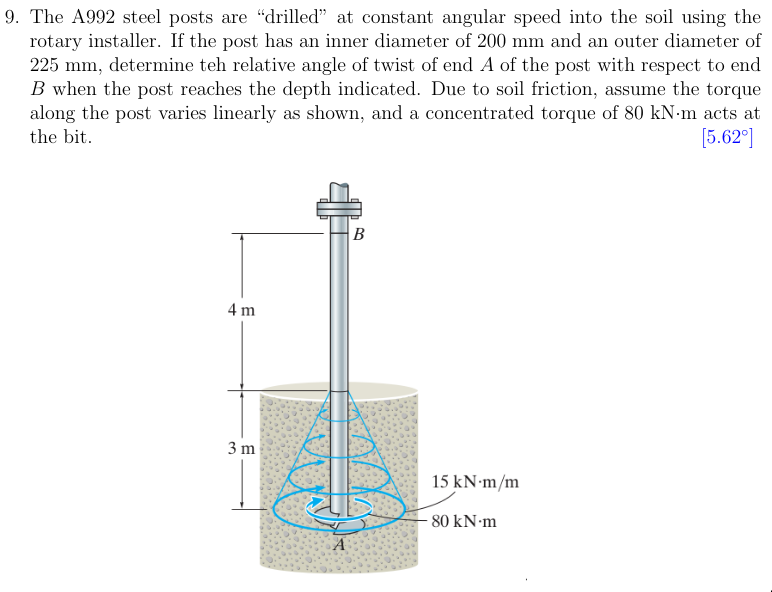

We take $z=0$ at A. Take the point at $z=3$ m as C. 

The distributed torque goes decreases from a value of 15 kN$\cdot$m/m at A ($z=0$) to 0 at C ($z=3$ m).

We will first find $\phi_{C/A}$. For this we will have to consider the torque properly between A and C. 

If make a cut between A and C, and take the lower cut-section, the torque at that cut will be given by:

\begin{gather*}
T_1(z) = 80 + \int_0^z \left( 15 + \frac{(0-15)}{(3-0)}z \right) \; {\rm d} z
\end{gather*}
(Note that T_1(z) will be evalued in kN$\cdot$m)

In [1]:
import sympy as sym
z = sym.symbols('z')

In [2]:
T1 = 80 + sym.integrate(15 + (0-15)/(3-0)*z,(z,0,z))
display(T1)

-2.5*z**2 + 15.0*z + 80

Using $T_1$, we will now evaluate $\phi_{C/A}$:

\begin{gather*}
\phi_{C/A} = \int_0^ 3 \frac{T_1 \; {\rm d} z}{G J}
\end{gather*}

For now we will keep $G$ and $J$ symbolic. Later we will substitute the proper values. 

In [3]:
G, J = sym.symbols('G, J')

In [4]:
phi_CA = sym.integrate(T1/(G*J),(z,0,3))
display(phi_CA)

285.0/(G*J)

Next, we will find $\phi_{B/C}$. For this we will have to consider the torque properly between B and C. 

If we make a cut between B and C, and take the lower cut-section, the torque at that cut will be given by:
\begin{gather*}
T_2 = 80 + \int_0^3 \left(15 + \frac{(0-15)}{(3-0)}z \right) \; {\rm d} z
\end{gather*}

(Again, $T_2$ will be evaluted in kN$\cdot$m)

In [5]:
T2 = 80 - sym.integrate((0-15)/(3-0)*z,(z,0,3))
display(T2)

102.500000000000

Using $T_2$, we will now evaluate $\phi_{B/C}$:
\begin{gather*}
\phi_{B/C} = \frac{T_2 L_{BC}}{GJ}
\end{gather*}

In [6]:
phi_BC = T2*4/(G*J)
display(phi_BC)

410.0/(G*J)

Now, $\phi_{B/A} = \phi_{B/C} + \phi_{C/A}$:

In [7]:
phi_BA = phi_BC + phi_CA
display(phi_BA)

695.0/(G*J)

Next, we calculate $J$, and put in the proper values ($G = 75$ GPa):

In [8]:
import numpy as np

d_in = 0.2
d_out = 0.225
J_value = 1/2*np.pi*( (d_out/2)**4 - (d_in/2)**4 )
display(J_value)

9.453156605345261e-05

In [9]:
G_value = 75e9

phi_BA_value = phi_BA.subs([(J,J_value),(G,G_value)])
display(phi_BA_value)

9.80272204675722e-5

Finally, we convert from radians to degrees and remember to account for the factor of 1000 because we have been using kN$\cdot$m for torque all along. 

In [10]:
phi_BA_value*180/np.pi*1e3

5.61654601019033